In [1]:
__author__ = 'Robert Nikutta <robert.nikutta@noirlab.edu>, Data Lab Team <datalab@noirlab.edu>'
__version__ = '20230726' # yyyymmdd
__datasets__ = ['gaia_dr3','smash_dr1']
__keywords__ = ['Jupyter','Python','SQL','tutorial','query']


<a class="anchor" id="goals"></a>
# Goals
Learn or review the basics of:
- How to use a Jupyter notebook
- Simple Python operations, package imports, and simple plots
- Importing Data Lab packages
- Logging in to Data Lab
- Query the Data Lab database through SQL

<a class="anchor" id="summary"></a>
# Summary
In this notebook, we provide a review of simple Jupyter notebook operations, basic Python, and show how to access catalog data through the Data Lab.  We construct a basic Structured Query Language (SQL) query, and issue it through the Data Lab both in while-you-wait (synchronous) and batch (asynchronous) mode.

# Table of contents


## Jupyter 101
* [Get by with just a few shortcuts](#shortcuts)


## Python 101 - 201
* [Hello world](#hello) _print()_
* [Hello you](#helloyou) _functions_
* [2 + 2](#calc) _math_
* [If it quacks like a duck...](#duck) _types_
* [Extra power through modules](#modules) _packages_
* [Everything is an object](#object) _attributes & methods_
* [Example: Plot a 1-d function](#plot1d) _plotting_
* [Example: Plot a 2d Gaussian](#gauss2d) _array calcs_
* [Example: Make a scatter plot](#scatter) _export data to file_

## Data Lab 101
* [Import Data Lab packages](#dlimport)
* [Login](#login)

## SQL 101
* [Structure of a simple query](#querystructure)
* [Our first Data Lab query](#firstquery)
* [LIMIT yourself](#limit)
* [What's there anyway?](#whatsthere)
* [Async queries](#asy)

## Links you need

| What | Where |
|------|-------|
|Get your Data Lab account now!| https://datalab.noirlab.edu/account/register.html |
|To the Data Lab notebook server!| https://datalab.noirlab.edu/devbooks |
|Always look to the Data Lab user manual (and use search function)| https://datalab.noirlab.edu/docs/manual/ |
|Ask questions on our help desk| https://datalab.noirlab.edu/help/ |





# Jupyter notebook
<a class="anchor" id="shortcuts"></a>

## Get by with just a few shortcuts

Everything is entered into _cells_. A cell can hold text, or code, or an image, etc.

A _code_ cell can be executed (i.e. the Python code can be _run_), just select the cell (move arrows up/down), then press `SHIFT + ENTER`

`ESC + m` change cell type to mardown (for writing text)

`ESC + y` change cell type to code (for entering Python code)

`ESC + a` add a new cell above the current one

`ESC + b` add a new cell below the current one

`ESC + x` cut/delete a cell

`ESC + v` paste a cell

`ESC + h` pop up a help window (more shortcuts)

# Python 101 - 201
<a class="anchor" id="hello"></a>
## Hello World!
Python is an interpreted programming language.
You write a line of Python code, or many lines, and run them. No compilation step.

In [2]:
print("Hello World!")

Hello World!


Note that strings are within single '' or double "" quotes.

<a class="anchor" id="helloyou"></a>
## Hello you!
Let's write our first function. The template for functions is always the same:

```
def function_name(arguments):
    do something
    [return something] # optional
```
Note: Comment lines in Python begin with `#`

In [3]:
def helloyou(name):
    # will print your name
    print("Hello",name,'!')

Separate all arguments to the print function by commas. They will all be printed in order.

In [4]:
helloyou('Kitty')

Hello Kitty !


<a class="anchor" id="calc"></a>
## 2 + 2
Use Python as a powerful calculator. Here are some examples.

In [5]:
2+2

4

In [6]:
3**1.2345 # 3 to the power of 1.2345

3.881558974007327

In [7]:
17 / 3 # classic division always returns a float

5.666666666666667

In [8]:
17 // 3 # floor division discards the fractional part  

5

In [9]:
2*"yo"

'yoyo'

<a class="anchor" id="duck"></a>
## Python has _duck typing_ 🦆
If it walks like a duck and quacks like a duck, it must be a duck!

In [10]:
type(2)

int

In [11]:
type(3.1415)

float

In [12]:
type('word')

str

In [13]:
type(helloyou)

function

In [14]:
a = 2
b = 3.1415
c = a*b
type(c)

float

In [15]:
int(3.1415) # convert a float to an int

3

In [16]:
float(2) # convert an int to a float

2.0

<a class="anchor" id="modules"></a>
## Extra power with modules/packages
Python has a lot of functionality built-in in its standard library.
But much more functionality can be added by importing specific packages.

In [17]:
import numpy  # "numeric python" - math and array operations

Or import under a different (often shorter) name:

In [18]:
import numpy as np

In [19]:
np.sqrt(17)

4.123105625617661

In [20]:
np.rad2deg(2*np.pi) # convert radians to degrees

360.0

In [21]:
np.rad2deg(1)

57.29577951308232

In [22]:
a = np.array((1,2,3))
b = np.array((3,2,1))
print("Vector                 a =", a)
print("Vector                 b =", b)
print()
print("Sum                  a+b =", a+b)
print("Element-wise product a*b =", a*b)
print("Dot product          a.b =", np.dot(a,b))

Vector                 a = [1 2 3]
Vector                 b = [3 2 1]

Sum                  a+b = [4 4 4]
Element-wise product a*b = [3 4 3]
Dot product          a.b = 10


<a class="anchor" id="object"></a>
## Everything in Python is an object...
... and objects have inherent characteristics ...

In [23]:
A = np.eye(3) # rank-3 identity matrix (just a 2-d Numpy array with float values)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
A.shape # shape of the array

(3, 3)

In [25]:
A.size  # how many elements in A

9

In [26]:
A.ndim # number of array dimensions

2

## ... and objects can do things

In [27]:
A.diagonal()

array([1., 1., 1.])

In [28]:
A.mean()

0.3333333333333333

In [29]:
np.std(A) # standard deviation

0.4714045207910317

In [30]:
A.sort() # sort each row in ascending order
print(A)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


<a class="anchor" id="plot1d"></a>
# Example: Plot a 1-d function

All we need to start plotting... is a plotting module!

In [31]:
import pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5,5)

In [32]:
x = np.linspace(0,2*np.pi,100) # create an array of evenly-spaced values starting at 0,ending at 2*pi,with 100 steps
print(x)
print('Steps: ',x.size)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

In [33]:
y = np.sin(x)

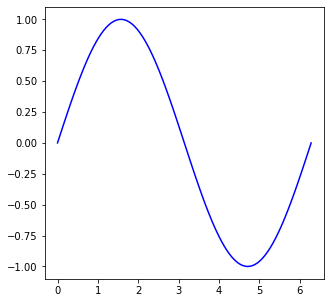

In [34]:
plt.plot(x,y,'b-')

<a class="anchor" id="gauss2d"></a>
# Example: Plot a 2-d Gaussian

In [35]:
from astropy.modeling.models import Gaussian2D

In [36]:
g = Gaussian2D(x_mean=0,y_mean=0,x_stddev=5,y_stddev=10)

In [37]:
nx = 100
half = nx//2
x = np.linspace(-half,half,nx)
# meshgrid creates a rectangular grid out of an array of x values and an array of y values
X,Y = np.meshgrid(x,x) # using x for both x and y axes, since we want a square grid anyway

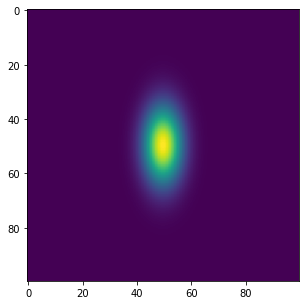

In [38]:
plt.imshow(g(X,Y))

<a class="anchor" id="scatter"></a>
# Example: Make a scatter plot

In [39]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

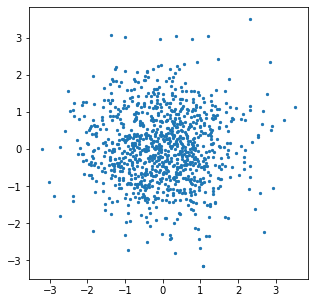

In [40]:
plt.scatter(x,y,s=5)

# Data Lab 101
Full introduction to Data Lab in the tutorial session.

For now just the bare minimum to get us started.

<a class="anchor" id="dlimport"></a>
## Import Data Lab packages (almost always this way)

In [41]:
from dl import authClient as ac, queryClient as qc
from dl.helpers.utils import convert
from getpass import getpass

<a class="anchor" id="login"></a>
## Log in
Much of the functionality of Data Lab can be accessed without explicitly logging in (the service then uses an anonymous login). But some capacities, for instance saving the results of your queries to your virtual storage space, require a login (i.e. you will need a registered user account).

If you need to log in to Data Lab, un-comment the cell below and execute it:

In [42]:
#token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))
ac.whoAmI()

# SQL - Structured Query Language

<a class="anchor" id="querystructure"></a>
## SQL is a way to describe to a database what you want from it
General template for a simple query written in SQL
```
SELECT something
FROM database.table
WHERE constraints
```

The `something` is usually a list of column names, e.g. `SELECT ra,dec`

A `database` has a name, and usually holds several `table`s.

E.g. to access columns in the `gaia_dr3` database, `gaia_source` table, one could ask for
`gaia_dr3.gaia_source`

The `constaints` are filters, or qualifiers, on the query, e.g.:

`WHERE ra>90`

Or combine several constaints:

```
WHERE ra>90 AND ra<100
AND dec>40 AND dec<42
```

<a class="anchor" id="limit"></a>
## LIMIT yourself
If you append a `LIMIT 100` (or any small number) to your query, the database will return only the first 100 result rows. This is usually fast and you can tweak your query many times this way until you get it right.

**Excellent advice while testing queries: LIMIT yourself.**

The template becomes:
```
SELECT something
FROM database.table
WHERE constraints
LIMIT 100
```

<a class="anchor" id="firstquery"></a>
## Our first Data Lab query
Let's ask for the radial velocities of all stars in Gaia DR3 around the position of the LMC

In [43]:
# coordinates of the LMC
#ra = 81.
#dec = -69.8

query = """
SELECT radial_velocity
FROM gaia_dr3.gaia_source
WHERE ra>78 and ra<84
  AND dec>-73 and dec<-67
  AND radial_velocity != 'nan'
  AND abs(radial_velocity)>0.
"""

print(query)


SELECT radial_velocity
FROM gaia_dr3.gaia_source
WHERE ra>78 and ra<84
  AND dec>-73 and dec<-67
  AND radial_velocity != 'nan'
  AND abs(radial_velocity)>0.



Now let's submit the query to the Data Lab database

In [44]:
%%time
result = qc.query(sql=query)

CPU times: user 30.5 ms, sys: 4.7 ms, total: 35.2 ms
Wall time: 14.7 s


It took some time (under a minute I hope), and the returned result is in the variable called `result`.

What type is `result`?

In [45]:
type(result)

str

The type is 'str' or string.

How long is this 'str' object? (in characters)

In [46]:
len(result)

136132

That's many characters! Let's print the first 200 or so:

In [47]:
result[:200]

'radial_velocity\n4.155434\n238.55446\n254.06628\n48.141098\n-12.778127\n210.53014\n5.028206\n24.298592\n21.564756\n31.360075\n66.51129\n29.528\n242.24164\n11.324264\n36.658955\n14.816024\n255.58084\n265.13043\n5.139609\n'

It's like a long string. The `\n` are line breaks. The first line is the header (here just `radial_velocity`).

It's hard to plot a long text object. We convert to a more "numerical" data format:

In [48]:
df = convert(result) # df mean data frame

What does the converted table look like?

In [49]:
print(df.shape)
df.head(5)

(14016, 1)


,radial_velocity
0,4.155434
1,238.554460
2,254.066280
3,48.141098
4,-12.778127


Ah yes, 14016 rows, and 1 column (`radial_velocity`).

Let's plot a histogram of the radial velocities:

(-100.0, 500.0)

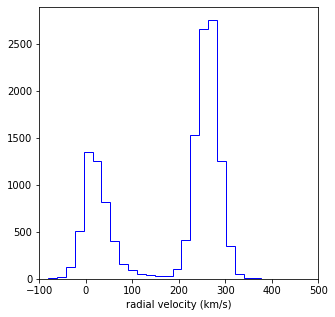

In [50]:
res = plt.hist(df['radial_velocity'],bins=50,histtype='step',color='b')
plt.xlabel('radial velocity (km/s)')
plt.xlim(-100,500)

The radial velocity of the LMC is ~270 km/s.

<a class="anchor" id="whatsthere"></a>
# What's there anyway?
How can you find what databases and tables there are in Data Lab?

## List all databases:

In [51]:
print(qc.schema())


     Schema Name   Description
     -----------   -----------
         allwise   The AllWISE data release
     buzzard_dr1   Buzzard Data Release 1
     catwise2020   CatWise 2020 data, containing the main catalog with 190 co
                   lumns and 5 cross-match tables with main catalogs: AllWise
                   DR2, GAIA EDR3, NSC DR2, SDSS DR16 and unWise DR1
         dad_dr1   DECam Asteroid Database -- Data Release 1
         dad_dr2   DECam Asteroid Database -- Data Release 2
      decaps_dr1   DECaPS Survey Data Release 1
      decaps_dr2   DECaPS Survey Data Release 2
       delve_dr1   First data release of the DELVE survey (Drlica-Wagner et a
                   l. 2020)
       delve_dr2   Second data release of the DELVE survey
         des_dr1   Dark Energy Survey (DES) Data Release 1
         des_dr2   Dark Energy Survey (DES) Data Release 2
        des_sva1   DES SVA1 Data Products
        desi_edr   Early Data Release from the Dark Energy Spectroscopic Inst
     

## List all tables in a database:

In [52]:
print(qc.schema('smash_dr1'))


Schema: smash_dr1

      Table Name   Description
      ----------   -----------
            chip   Info on each chip in the frame
        exposure   Info on each exposure
           field   Info on each target field (position, Num exposures, etc)
        galaxies   View of object table to select for galaxies
          object   Average photometry of each unique object
          source   All of the individual source measurements
           stars   View of object table to select for stars
x1p5__object__gaia_dr3__gaia_source   smash_dr1.object and gaia_dr3.gaia_source crossmatch (1.5 
                   arcsec)
x1p5__object__nsc_dr2__object   smash_dr1.object and nsc_dr2.object crossmatch (1.5 arcsec)
x1p5__object__unwise_dr1__object   smash_dr1.object and unwise_dr1.object crossmatch (1.5 arcsec)
          xmatch   Crossmatch of object against GAIA DR1 and WISE



## List all columns in a table in a database

In [53]:
print(qc.schema('smash_dr1.object'))


Schema: smash_dr1
 Table: object

     Column Name   Description
     -----------   -----------
              id   Unique ID for this object, the field name plus a running number
         fieldid   SMASH Field ID
              ra   Right Ascension (J2000.0) of source, in degrees
             dec   Declination (J2000.0) of source, in degrees
            glon   Galactic Longitude
            glat   Galactic Latitude
            elon   Ecliptic Longitude
            elat   Ecliptic Latitude
            htm9   HTM index (order 9 => ~10 arcmin size)
         ring256   HEALPIX index (Nsides 256, Ring scheme => ~14 arcmin size)
        nest4096   HEALPIX index (Nsides 4096, Nest scheme => ~52 arcsec size
       random_id   Random ID in the range 0.0 => 100.0
           raerr   Uncertainty in mean RA of object (arcseconds) from indiv values
          decerr   Uncertainty in mean DEC of object (arcseconds) from indiv 
                   values
            ndet   Number of detections of this so

<a class="anchor" id="asy"></a>
# If you're too cool to be sitting around: async queries
A query that could run potentially longer than your attention span... In that case just submit it in async mode, and retrieve the results later when the query is done (and when you've had your well-deserved coffee):

In [54]:
query = """SELECT ra,dec FROM smash_dr1.object 
WHERE fieldid = 169 AND depthflag > 1 
AND ndetr > 3 AND ndetg > 3 
AND abs(sharp) < 0.5 
AND gmag BETWEEN 9 AND 25 
AND (gmag-rmag) BETWEEN -0.4 AND 0.4"""

Asynchronous queries get a jobid upon submission e.g.:

```
jobid = qc.query(adql=query,async_=True)
print(jobid)
q5qy6ujsu9cnygcp
```

You can then check periodically for the status of the query, by submitting the `jobid` string to the `status` method:

```
qc.status(jobid)
'EXECUTING'
```

If you repeat the `status` request a bit later, it will eventually change to `'COMPLETED'`, at which point you can retrieve the result:

```
result = qc.results(jobid)
```

**Luckliy, there is a built-in mechanism to do the periodic checking for you.** It also retrieves the results of your query for you at the end. The signature is:

```
result = qc.query(sql=query,async_=True,wait=True,poll=5,verbose=1)
```

where `poll` sets the polling period (in seconds).

In [55]:
result = qc.query(adql=query,async_=True,wait=True,poll=5,verbose=1)

EXECUTING
Status = COMPLETED; elapsed time: 5, timeout in 295
Retrieving results


Convert to Pandas dataframe, just like before:

In [56]:
df = convert(result)

Use the dataframe as you please, e.g. here to plot RA & Dec:

Text(0, 0.5, 'dec')

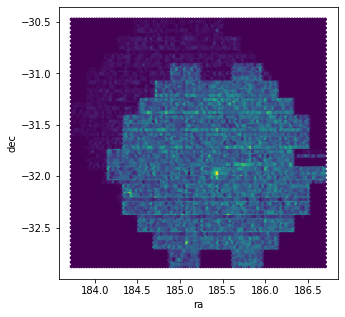

In [57]:
plt.figure(figsize=(5,5))
plt.hexbin(df['ra'],df['dec'])
plt.xlabel('ra')
plt.ylabel('dec')